In [5]:
!pip install PySCeS
!pip install stochpy

In [6]:
import stochpy

In [7]:
def doSequentialSim(smod,n_generations,cell_division_times):    
    for i in range(1,n_generations):     
        ### divide each species between two daughter cells ###        
        for j in range(0,len(smod.data_stochsim.species_labels)): 
            species_amount = smod.SSA.sim_output[-2][1:][j]     
            if species_amount:
                smod.settings.X_matrix[j] = np.random.binomial(n=species_amount
                                                               ,p=0.5,size=1)                
        ### replace last time point with species amounts after division ###
        species_after_division = copy.deepcopy(list(smod.settings.X_matrix))
        species_after_division.insert(0,cell_division_times[0:i].sum())
        species_after_division.append(np.NAN) # no reaction occurred at cell division
        smod.SSA.sim_output[-1] = copy.deepcopy(species_after_division)                         
        ### Set settings for new simulation and simulate the next generation ### 
        smod.settings.starttime = copy.deepcopy(smod.SSA.sim_output[-1][0])
        smod.settings.endtime = smod.settings.starttime + cell_division_times[i]
        smod.SSA.Execute(smod.settings,False) # do stochastic simulation     
    smod.FillDataStochsim() # add all data to data_stochsim object

In [8]:
import stochpy, numpy as np,copy,os,matplotlib.gridspec as gridspec
smod = stochpy.SSA(model_file='DBD_test.psc',dir='/root/Stochpy/pscmodels')
T_GENERATION = 60

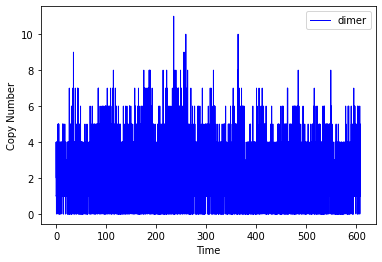

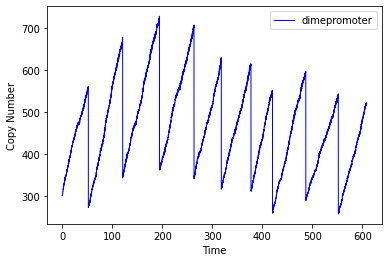

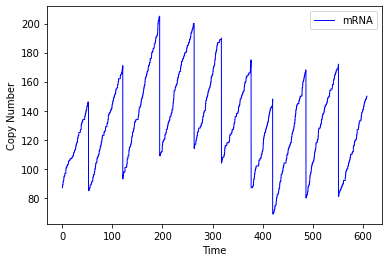

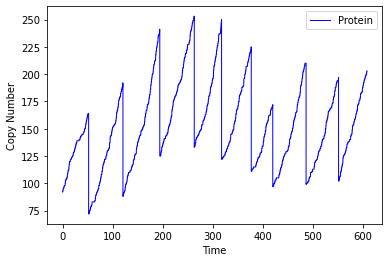

In [17]:
### 1: Do short simulations for a time series plot ###
N_GENERATIONS = 10
CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS)) 
smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=1)
doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)
smod.PlotSpeciesTimeSeries(species2plot=['dimer'])
smod.PlotSpeciesTimeSeries(species2plot=['dimepromoter'])
smod.PlotSpeciesTimeSeries(species2plot=['mRNA'])
smod.PlotSpeciesTimeSeries(species2plot=['Protein'])

In [ ]:
### 2: Do long simulation for probability density function of protein copy numbers ###
N_GENERATIONS = 100
CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS)) 
smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=1)
doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)
smod.PlotSpeciesTimeSeries(species2plot=['dimer'])
smod.PlotSpeciesTimeSeries(species2plot=['dimepromoter'])
smod.PlotSpeciesTimeSeries(species2plot=['mRNA'])
smod.PlotSpeciesTimeSeries(species2plot=['Protein'])

In [ ]:
### 1: Do short looping simulations for a time series plot ###
k2 = [1,5,10,20,50]
for i in k2:
  print('simulation with k2 =',i)
  graphtitle = str('k2 ='+str(i))
  smod.ChangeParameter('k2',i)
  N_GENERATIONS = 10
  CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS)) 
  smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=1)
  doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)
  smod.PlotSpeciesTimeSeries(species2plot=['mRNA'],title=graphtitle)
  smod.PlotSpeciesTimeSeries(species2plot=['Protein'],title=graphtitle)
  print('done')

simulation with k2 = 1
done
simulation with k2 = 5
done
simulation with k2 = 10
